In [1]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate, postprocess_grids
from lucifex.utils import grid, spacetime_grid, cross_section, maximum
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.io import write

from co2_dissolution_pkg.sim import solutal_rectangle


STORE = 1
WRITE = None

simulation = solutal_rectangle(store_step=STORE, write_step=WRITE)(
    Nx=64,
    Ny=64,
    Ra=1e3,
    Da=5e2,
    epsilon=1e-2,
    c_limits=(0, 1),
    c_seed=(567, 765),
    secondary=True,
)

n_stop = 100
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)
# if WRITE:
#     postprocess_grids(simulation, delete_h5_xdmf=False)

{'t': ConstantSeries(Unsolved; t⁽⁰⁾; Unsolved), 'dt': ConstantSeries(Unsolved; Unsolved), 'sMinMax': ConstantSeries(Unsolved; Unsolved), 'c': FunctionSeries(Unsolved; c⁽⁰⁾; Unsolved), 'mD': ConstantSeries(Unsolved; Unsolved), 'uMinMax': ConstantSeries(Unsolved; Unsolved), 'mC': ConstantSeries(Unsolved; Unsolved), 'dtK': ConstantSeries(Unsolved; Unsolved), 'f': ConstantSeries(Unsolved; Unsolved), 'fBoundary': ConstantSeries(Unsolved; Unsolved), 's': FunctionSeries(Unsolved; s⁽⁰⁾; Unsolved), 'psi': FunctionSeries(Unsolved; Unsolved), 'u': FunctionSeries(Unsolved; Unsolved; Unsolved), 'cMinMax': ConstantSeries(Unsolved; Unsolved), 'dtCFL': ConstantSeries(Unsolved; Unsolved), 'epsilon': Constant(Mesh(VectorElement(Basix element (P, quadrilateral, 1, gll_warped, unset, False), 2), 0), (), 8), 'varphi': Coefficient(FunctionSpace(Mesh(VectorElement(Basix element (P, quadrilateral, 1, gll_warped, unset, False), 2), 0), Basix element (P, quadrilateral, 1, gll_warped, unset, False)), 16), 'phi':

In [ ]:
from inspect import signature


def func(a, b):
    return a, b


signature(func).bind(3,4,5)

TypeError: too many positional arguments

: 

In [8]:
c, s, u, psi = simulation['c', 's', 'u', 'psi']
dt, dtCFL, dtK = simulation['dt', 'dtCFL', 'dtK']
sMinMax, cMinMax, uMinMax = simulation['sMinMax', 'cMinMax', 'uMinMax']
f, fBoundary = simulation['f', 'fBoundary']
fInterface = f.sub(0)
fPlus = f.sub(1)
fMinus = f.sub(2)

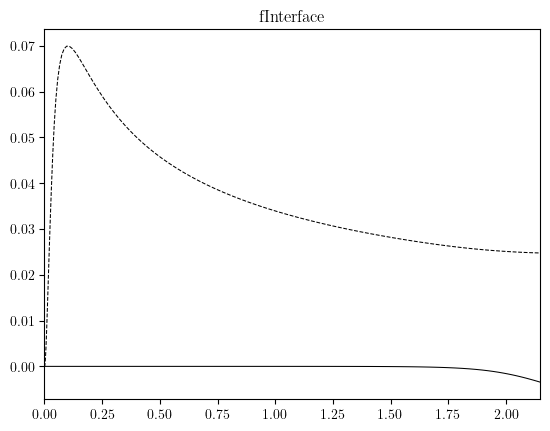

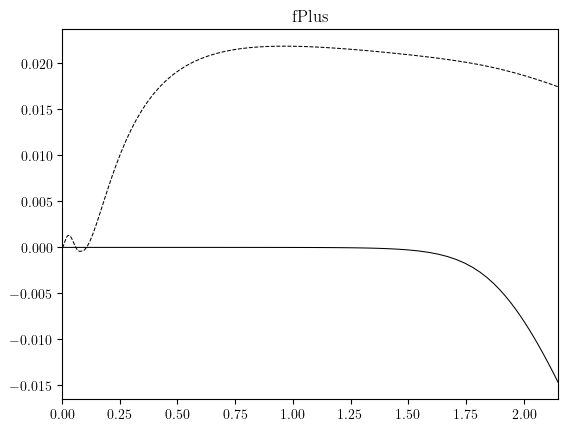

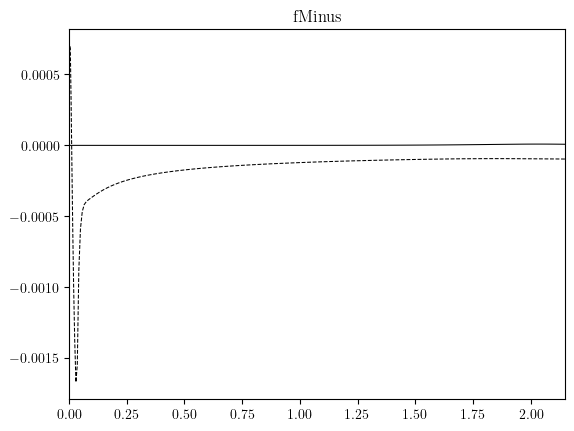

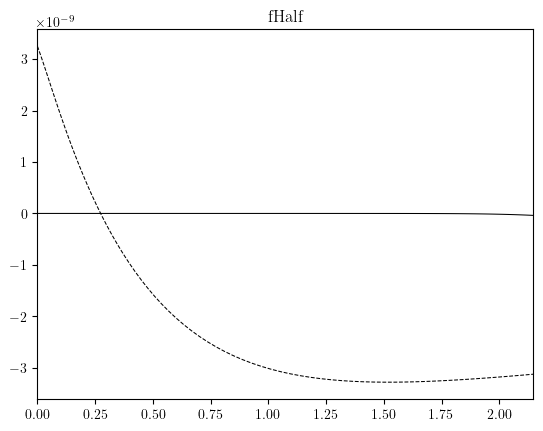

In [11]:
for f_sub in f.split():
    plot_line((f_sub.time_series, f_sub.value_series), title=f'{f_sub.name}', cyc='black')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.plot([1,2,3], [np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3])])

In [ ]:
for i in (0, 1, -1):
    fig, ax = plot_colormap(s.series[i], aspect='auto')
    ax.set_ylim(0.8, 1.0)

In [ ]:
y_axis, sy, x_value = cross_section(s.series[15], 'x', 0.5)
y_axis, sy0, x_value = cross_section(s.series[0], 'x', 0.5)
plot_line(
    [(y_axis, sy0), (y_axis, sy)], 
    x_label='$y$', y_label=f'$s(x={x_value:.2f})$')

In [ ]:
for i in (0, 1, -1):
    fig, ax = plot_colormap(c.series[i])